# Autoencoder

## Import Package

In [1]:
from keras import layers
from keras import models

Using TensorFlow backend.


## Autoencoder

In [3]:
encoding_dim = 32 # 축소된 representation vector의 크기

input_img = layers.Input(shape=(784,))
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)
decoded = layers.Dense(784, activation='sigmoid')(encoded)

autoencoder = models.Model(input_img, decoded)
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_3 (Dense)              (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


## Compile autoencoder

In [5]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

## Load Data

In [10]:
from keras import datasets
import numpy as np

(x_train, _), (x_test, _) = datasets.mnist.load_data()
x_train = x_train / 255
x_test = x_test / 255
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


## Learning

In [11]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 5s 89us/step - loss: 0.3685 - val_loss: 0.2715
Epoch 2/50
60000/60000 [==============================] - 5s 78us/step - loss: 0.2651 - val_loss: 0.2549
Epoch 3/50
60000/60000 [==============================] - 5s 81us/step - loss: 0.2442 - val_loss: 0.2313
Epoch 4/50
60000/60000 [==============================] - 5s 76us/step - loss: 0.2230 - val_loss: 0.2128
Epoch 5/50
60000/60000 [==============================] - 5s 78us/step - loss: 0.2073 - val_loss: 0.1998
Epoch 6/50
60000/60000 [==============================] - 5s 78us/step - loss: 0.1965 - val_loss: 0.1908
Epoch 7/50
60000/60000 [==============================] - 5s 78us/step - loss: 0.1886 - val_loss: 0.1837
Epoch 8/50
60000/60000 [==============================] - 5s 79us/step - loss: 0.1819 - val_loss: 0.1775
Epoch 9/50
60000/60000 [==============================] - 5s 7

## Running Autoencoder

In [12]:
decoded_imgs = autoencoder.predict(x_test)

## Draw Result

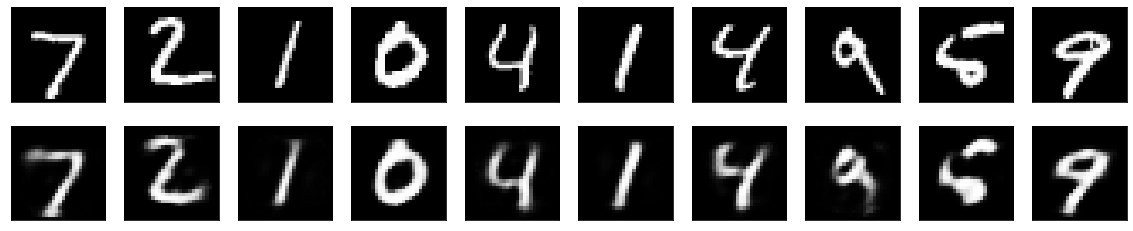

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt

n = 10
plt.figure(figsize=(20,4))
for i in range(n):
    # original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # result
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()